In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Random putivate identification number

# Load CSV file
csv_file = 'input.csv'  # Replace with your CSV file path
data = pd.read_csv(csv_file)

# Determine the total number of rows
total_rows = len(data)

# Create a list with 500 1s, 100 2s, and the rest 0s
num_ones = 200
num_twos = 2000
num_zeros = total_rows - num_ones - num_twos  # Remaining values will be 0
values = [1]*num_ones + [2]*num_twos + [0]*num_zeros

# Shuffle the list to randomize the distribution
np.random.shuffle(values)

# Add the list as a new column to the DataFrame
data['new_column'] = values

# Save the updated DataFrame back to a CSV file
data.to_csv('input.csv', index=False)  # Replace 'updated_csv_file.csv' with your desired output file name

In [3]:
data

,131.0505,4.1305,new_column
0,338.0873,2.8162,0
1,176.1194,2.9444,2
2,76.0393,2.9991,0
3,297.1455,2.0318,0
4,144.0856,2.2195,2
...,...,...,...
8299,361.2119,5.2673,0
8300,622.8333,0.2594,0
8301,254.1275,3.1127,0
8302,375.2307,5.2670,2


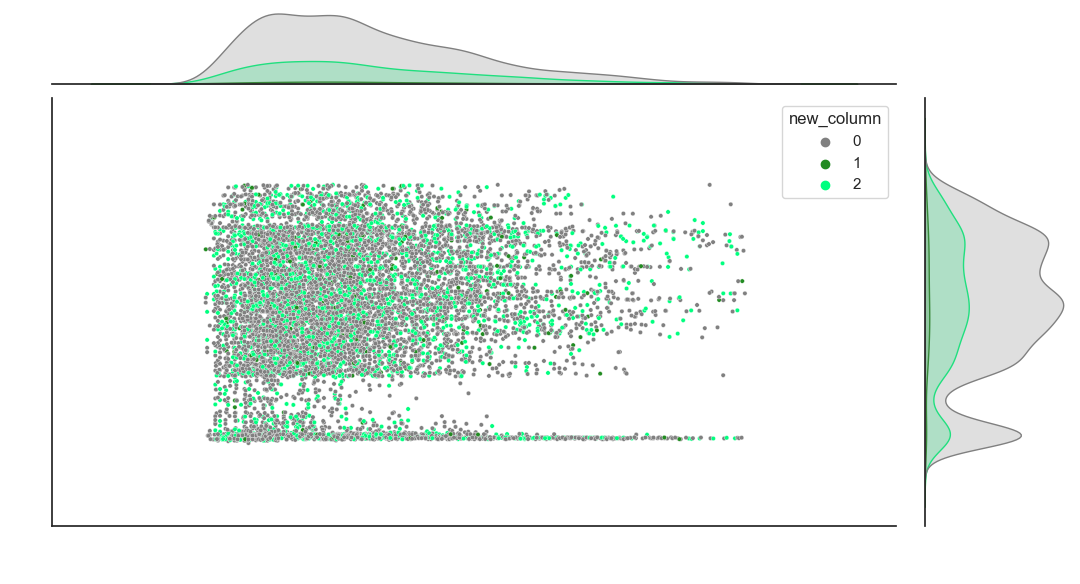

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

background_color = 'white'

csv_file = 'input.csv'  # Replace with your CSV file path
data = pd.read_csv(csv_file)

sns.set_theme(style=background_color)  # Setting the theme

# Using seaborn's jointplot with hue for differentiation
p = sns.jointplot(data=data, x='131.0505', y='4.1305', hue='new_column', palette=['grey', 'forestgreen', 'springgreen'], joint_kws={'s': 10})

# Adjusting the plot's figure and axes properties directly
p.fig.set_facecolor(background_color)  # Set the outer background color
p.ax_joint.set_facecolor(background_color)  # Set the joint plot area background color
p.ax_marg_x.set_facecolor(background_color)  # Set the marginal x histogram background color
p.ax_marg_y.set_facecolor(background_color)  # Set the marginal y histogram background color

# Adjusting the ticks and labels color to enhance visibility on a black background
p.ax_joint.tick_params(colors='white')
p.ax_joint.xaxis.label.set_color('white')
p.ax_joint.yaxis.label.set_color('white')

# For the marginal axes (histograms), you may also want to adjust text colors
for tl in p.ax_marg_x.get_yticklabels():
    tl.set_color('white')
for tl in p.ax_marg_y.get_xticklabels():
    tl.set_color('white')

    
p.fig.set_size_inches(12, 6)  # 
plt.show()


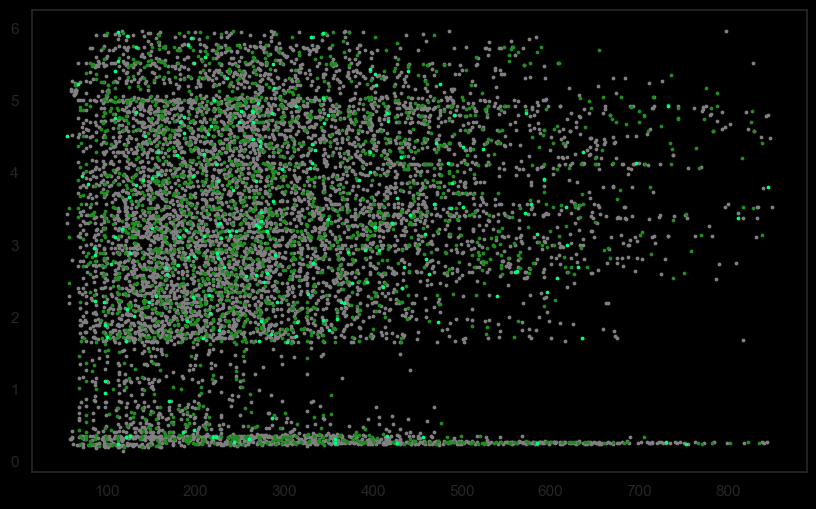

In [5]:
# Load CSV file
csv_file = 'input.csv'  # Replace with your CSV file path
data = pd.read_csv(csv_file)

# Extract x and y columns
x = data.iloc[:, 0]  # Assuming the first column is x
y = data.iloc[:, 1]  # Assuming the second column is y

# Separate data based on 'new_column' values
data_0 = data[data['new_column'] == 0]
data_1 = data[data['new_column'] == 1]
data_2 = data[data['new_column'] == 2]

# Plot
plt.figure(figsize=(10, 6), facecolor='black')  # Set figure background color
# plt.axis('off')

# Plot each subset in the desired order (0 -> 2 -> 1)
plt.scatter(data_0.iloc[:, 0], data_0.iloc[:, 1], s=3, c='grey')  # 0 (dimgrey) at the bottom layer
plt.scatter(data_2.iloc[:, 0], data_2.iloc[:, 1], s=3, c='forestgreen')  # 2 (forest green) in the middle layer
plt.scatter(data_1.iloc[:, 0], data_1.iloc[:, 1], s=3, c='springgreen')  # 1 (spring green) at the top layer

# Set the background color
plt.gca().set_facecolor('black')  # Ensure the background color matches the figure's

# Show the plot
plt.show()

# Generate random dataset

In [6]:
np.random.seed(0)  # For reproducibility
rows = 8305 

mean_x, std_dev_x = 0, 1  # Mean and standard deviation for x
mean_y, std_dev_y = 0, 1  # Mean and standard deviation for y

data = {
    'x': np.random.normal(loc=mean_x, scale=std_dev_x, size=rows),
    'y': np.random.normal(loc=mean_y, scale=std_dev_y, size=rows),
    'new_column': np.random.choice([0, 1, 2], size=rows, p=[0.38, 0.5, 0.12])  # Distribution for 'new_column'
}

df_normal = pd.DataFrame(data)

# Generate the 'new_column' with specific counts for 0, 1, and 2, without using Normal distribution for this column
num_ones = 200  # Number of 1s
num_twos = round(0.771 * 8305)  # Number of 2s
num_zeros = rows - num_ones - num_twos  # Calculate the number of 0s based on total rows

# Create a list with the specified distribution of 0s, 1s, and 2s
new_column_values = [0]*num_zeros + [1]*num_ones + [2]*num_twos

# Shuffle the list to randomize the distribution of values
np.random.shuffle(new_column_values)

# Assign this list to the 'new_column' in the DataFrame
df_normal['new_column'] = new_column_values

# Verify the distribution by counting the values in 'new_column'
df_normal['new_column'].value_counts()

2    6403
0    1702
1     200
Name: new_column, dtype: int64

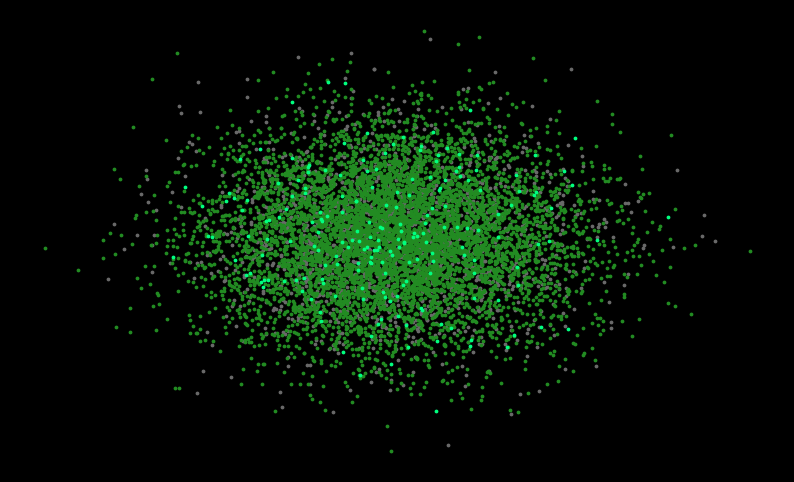

In [7]:
background_color = 'black'

# Extract x and y columns from df_normal
x = df_normal.iloc[:, 0]  # Assuming the first column is x
y = df_normal.iloc[:, 1]  # Assuming the second column is y

# Separate df_normal based on 'new_column' values
df_normal_0 = df_normal[df_normal['new_column'] == 0]
df_normal_1 = df_normal[df_normal['new_column'] == 1]
df_normal_2 = df_normal[df_normal['new_column'] == 2]

# Plot
plt.figure(figsize=(10, 6), facecolor=background_color)  # Set figure background color
plt.axis('off')  # Remove axes to display only points

# Plot each subset in the desired order (0 -> 2 -> 1)
plt.scatter(df_normal_0['x'], df_normal_0['y'], s=3, c='dimgrey')  # 0 (dimgrey) at the bottom layer
plt.scatter(df_normal_2['x'], df_normal_2['y'], s=3, c='forestgreen')  # 2 (forest green) in the middle layer
plt.scatter(df_normal_1['x'], df_normal_1['y'], s=3, c='springgreen')  # 1 (spring green) at the top layer

# Set the background color
plt.gca().set_facecolor(background_color)  # Ensure the background color matches the figure's
plt.savefig("scatter_plot.pdf", bbox_inches='tight', pad_inches=0, facecolor=background_color)


# Show the plot
plt.show()